**Exploratory Data Analysis**

In [1]:
#library/function file
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
cleanfiles=glob.glob('cleandata/cleandata*.csv') #use glob to make list of file names
cleandata=[]
for filename in cleanfiles:
    cleandata.append(pd.read_csv(filename))
print(cleandata[0].head())

    class  redshift  redshift_err  green_mag  green_err  green_ext   red_mag  \
0  GALAXY  0.185702      0.000051   20.27926   0.033027   0.404524  19.03009   
1  GALAXY  0.353038      0.000067   20.41617   0.051364   0.068213  18.74046   
2  GALAXY  0.527042      0.000099   22.38628   0.191882   0.094343  20.59653   
3  GALAXY  0.397942      0.000153   20.55792   0.069158   0.284085  18.78533   
4  GALAXY  0.613297      0.000307   21.39559   0.219298   0.173314  19.90453   

    red_err   red_ext  
0  0.017111  0.279848  
1  0.017799  0.047189  
2  0.058532  0.065266  
3  0.023086  0.196528  
4  0.089911  0.119898  


In [2]:
# double check data types
print(cleandata[-1].info())
print(cleandata[0].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7100 entries, 0 to 7099
Data columns (total 9 columns):
class           7100 non-null object
redshift        7100 non-null float64
redshift_err    7100 non-null float64
green_mag       7100 non-null float64
green_err       7100 non-null float64
green_ext       7100 non-null float64
red_mag         7100 non-null float64
red_err         7100 non-null float64
red_ext         7100 non-null float64
dtypes: float64(8), object(1)
memory usage: 499.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14089 entries, 0 to 14088
Data columns (total 9 columns):
class           14089 non-null object
redshift        14089 non-null float64
redshift_err    14089 non-null float64
green_mag       14089 non-null float64
green_err       14089 non-null float64
green_ext       14089 non-null float64
red_mag         14089 non-null float64
red_err         14089 non-null float64
red_ext         14089 non-null float64
dtypes: float64(8), object(1)
memory

In [3]:
#lets do some basic analysis on each sample size
print(cleandata[0].describe())
print(cleandata[6].describe())
print(cleandata[12].describe())
print(cleandata[35].describe())

           redshift  redshift_err     green_mag     green_err     green_ext  \
count  14089.000000  14089.000000  14089.000000  14089.000000  14089.000000   
mean       0.634001      0.007527     20.502305      0.091057      0.123099   
std        0.703804      0.326948      1.917021      0.140025      0.113821   
min       -0.000352     -4.000000     13.314280      0.001691      0.010848   
25%        0.174857      0.000031     18.783590      0.011762      0.062217   
50%        0.472265      0.000108     20.977720      0.048290      0.096359   
75%        0.632072      0.000193     22.000940      0.125751      0.153795   
max        7.011245     25.496150     26.557510      5.027443      4.907377   

            red_mag       red_err       red_ext  
count  14089.000000  14089.000000  14089.000000  
mean      19.354156      0.039004      0.085159  
std        1.697269      0.074755      0.078741  
min       12.560160      0.001599      0.007505  
25%       17.782160      0.008691     

While there are large outliers for almost all of our data, due to the large sample size we chose, the standard deviation,mean, and median are all a good representation of the values we were trying to pull. 

In [4]:
#now we will start to seperate this data and form it into the variable we want
# for the first part lets split up quasars and galaxies first
i=0
qso=[0]*40
galaxy=[0]*40
header=['class','redshift','redshift_err','green_mag','green_err',
                  'green_ext','red_mag','red_err','red_ext']
while i < len(cleandata):
    q=[]
    g=[]
    df=cleandata[i]
    for a in df.index:
        if df.loc[a,'class'] == "QSO":
            q.append(df.iloc[a,:])
        else:
            c=df.iloc[a,:]
            g.append(c.values)
    qso[i]=pd.DataFrame(q)
    galaxy[i]=pd.DataFrame(g)
    galaxy[i].columns=header
    galaxy[i]=galaxy[i].reset_index(drop=True)
    qso[i].columns=header
    qso[i]=qso[i].reset_index(drop=True)
    i+=1
    
print(galaxy[38].shape,qso[38].shape)

(5732, 9) (1405, 9)


In [5]:
print(galaxy[0].info(),galaxy[-1].info(),qso[0].info(),qso[-1].info())
#all data types were preserved so all is good

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11367 entries, 0 to 11366
Data columns (total 9 columns):
class           11367 non-null object
redshift        11367 non-null float64
redshift_err    11367 non-null float64
green_mag       11367 non-null float64
green_err       11367 non-null float64
green_ext       11367 non-null float64
red_mag         11367 non-null float64
red_err         11367 non-null float64
red_ext         11367 non-null float64
dtypes: float64(8), object(1)
memory usage: 799.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5814 entries, 0 to 5813
Data columns (total 9 columns):
class           5814 non-null object
redshift        5814 non-null float64
redshift_err    5814 non-null float64
green_mag       5814 non-null float64
green_err       5814 non-null float64
green_ext       5814 non-null float64
red_mag         5814 non-null float64
red_err         5814 non-null float64
red_ext         5814 non-null float64
dtypes: float64(8), object(1)
memory usag

In [6]:
#lets start with velocity and its associated errors and adding it to each respective data frame
c=299792.458 #kilometers/second
i=0
while i<len(cleandata):
    vq=[]
    vg=[]
    dfg=galaxy[i]
    dfq=qso[i]
    for a in dfg['redshift']:
        vg.append(c*((((a+1)**2)-1)/(((a+1)**2)+1)))
    for n in dfq['redshift']:
        vq.append(c*((((n+1)**2)-1)/(((n+1)**2)+1))) 
    dfg['velocity']=vg
    dfq['velocity']=vq
    qso[i]=dfq
    galaxy[i]=dfg
    i+=1
print(galaxy[0].head(),galaxy[-1].head(),qso[0].head(),qso[-1].head())

#now we have two lists of 40 data frames with the velocity added

    class  redshift  redshift_err  green_mag  green_err  green_ext   red_mag  \
0  GALAXY  0.185702      0.000051   20.27926   0.033027   0.404524  19.03009   
1  GALAXY  0.353038      0.000067   20.41617   0.051364   0.068213  18.74046   
2  GALAXY  0.527042      0.000099   22.38628   0.191882   0.094343  20.59653   
3  GALAXY  0.397942      0.000153   20.55792   0.069158   0.284085  18.78533   
4  GALAXY  0.613297      0.000307   21.39559   0.219298   0.173314  19.90453   

    red_err   red_ext       velocity  
0  0.017111  0.279848   50577.069224  
1  0.017799  0.047189   87978.193108  
2  0.058532  0.065266  119837.262632  
3  0.023086  0.196528   96835.245139  
4  0.089911  0.119898  133367.184223       class  redshift  redshift_err  green_mag  green_err  green_ext   red_mag  \
0  GALAXY  0.523694      0.000147   22.31447   0.132125   0.107906  20.97960   
1  GALAXY  0.545569      0.000205   22.43943   0.214560   0.172352  20.75089   
2  GALAXY  0.027745      0.000009   15.37505 

In [7]:
len(cleandata)

40

In [8]:
#now we do this to create a Flux column, then use it to create the distance
Fsun=1361 #watts/meter^2
msun=-26.7
i=0
while i<40:
    fluxq=[]
    fluxg=[]
    dfg=galaxy[i]
    dfq=qso[i]
    for a in dfg['green_mag']:
        power = .4*(msun-a)
        scale = np.power(10., power)
        flux = (Fsun*scale)
        fluxnum = float(flux)
        fluxg.append(fluxnum)
    for n in dfq['green_mag']:
        power = .4*(msun-n)
        scale = np.power(10., power)
        flux = Fsun*scale
        fluxnum = float(flux)
        fluxq.append(fluxnum)
    
    dfg['Flux']=fluxg
    dfq['Flux']=fluxq
    qso[i]=dfq
    galaxy[i]=dfg
    i+=1
print(galaxy[0].head(),galaxy[-1].head(),qso[0].head(),qso[-1].head())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in power
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in power


    class  redshift  redshift_err  green_mag  green_err  green_ext   red_mag  \
0  GALAXY  0.185702      0.000051   20.27926   0.033027   0.404524  19.03009   
1  GALAXY  0.353038      0.000067   20.41617   0.051364   0.068213  18.74046   
2  GALAXY  0.527042      0.000099   22.38628   0.191882   0.094343  20.59653   
3  GALAXY  0.397942      0.000153   20.55792   0.069158   0.284085  18.78533   
4  GALAXY  0.613297      0.000307   21.39559   0.219298   0.173314  19.90453   

    red_err   red_ext       velocity          Flux  
0  0.017111  0.279848   50577.069224  2.198640e-16  
1  0.017799  0.047189   87978.193108  1.938162e-16  
2  0.058532  0.065266  119837.262632  3.157520e-17  
3  0.023086  0.196528   96835.245139  1.700944e-16  
4  0.089911  0.119898  133367.184223  7.863613e-17       class  redshift  redshift_err  green_mag  green_err  green_ext   red_mag  \
0  GALAXY  0.523694      0.000147   22.31447   0.132125   0.107906  20.97960   
1  GALAXY  0.545569      0.000205   22.43

In [26]:
Lqso=(10**38) #watts
Lgal=5*(10**30) #watts
mpc=3.068*(10**22)#converting meters to megaparsecs
i=0
while i<40:
    dq=[]
    dg=[]
    dfg=galaxy[i]
    dfq=qso[i]
    for a in dfg['Flux']:
        distance = ((Lgal/(4*np.pi*a))**(.5))/mpc
        dg.append(distance)
    for n in dfq['Flux']:
        distance2 = ((Lqso/(4*np.pi*n))**(.5))/mpc
        dq.append(distance2)
    
    dfg['distance']=dg
    dfq['distance']=dq
    qso[i]=dfq
    galaxy[i]=dfg
    i+=1
print(galaxy[1].head(),qso[1].head())

    class  redshift  redshift_err  green_mag  green_err  green_ext   red_mag  \
0  GALAXY  0.000125      0.000014   20.16208   0.116693   0.300445  18.03309   
1  GALAXY  0.338332      0.000063   21.69420   0.093473   0.069798  20.27057   
2  GALAXY  0.136138      0.000031   18.49032   0.009709   0.080006  17.39950   
3  GALAXY  0.497418      0.000218   21.72578   0.110101   0.084952  20.13439   
4  GALAXY  0.637717      0.000157   22.11908   0.180011   0.114330  20.66385   

    red_err   red_ext       velocity          Flux  distance  
0  0.026010  0.207847      37.438802  2.449211e-16  1.313747  
1  0.045717  0.048286   84974.588577  5.972802e-17  2.660331  
2  0.006087  0.055348   38057.589530  1.142168e-15  0.608359  
3  0.042942  0.058770  114864.450395  5.801578e-17  2.699303  
4  0.068594  0.079093  136955.477569  4.038556e-17  3.235278     class  redshift  redshift_err  green_mag  green_err  green_ext   red_mag  \
0   QSO  1.986327      0.000681   20.97149   0.033328   0.06156

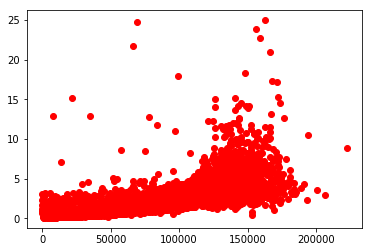

In [10]:
#Scatter of just galaxies from the first dataset
plt.plot(galaxy[0]["velocity"], galaxy[0]["distance"], "ro")
plt.show()

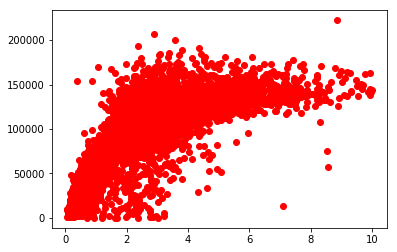

In [11]:
#Removing outliers and replotting
galaxy_outlierkiller = galaxy[0][galaxy[0]["distance"]<10]
#Scatter of just galaxies from the first dataset
plt.plot(galaxy_outlierkiller["distance"], galaxy_outlierkiller["velocity"], "ro")
plt.show()

In [12]:
#It seems that the farther away an object is, the faster it is moving. Good sign. 
#However, it seems the relationship in our data isn't linear. 
#Velocity appears to be related to distance in a logarithmic fashion, or perhaps to the square root of distance.
model2 = sm.ols(formula = "galaxy_outlierkiller['velocity'] ~ galaxy_outlierkiller['distance']", data=galaxy_outlierkiller).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     galaxy_outlierkiller['velocity']   R-squared:                       0.713
Model:                                          OLS   Adj. R-squared:                  0.713
Method:                               Least Squares   F-statistic:                 2.805e+04
Date:                              Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                                      13:09:38   Log-Likelihood:            -1.2990e+05
No. Observations:                             11302   AIC:                         2.598e+05
Df Residuals:                                 11300   BIC:                         2.598e+05
Df Model:                                         1                                         
Covariance Type:                          nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                         3.382e+04    371.127     91.141      0.000    3.31e+04    3.46e+04
galaxy_outlierkiller['distance']  2.295e+04    137.038    167.469      0.000    2.27e+04    2.32e+04
==============================================================================
Omnibus:                     1036.162   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3322.830
Skew:                          -0.466   Prob(JB):                         0.00
Kurtosis:                       5.487   Cond. No.                         4.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

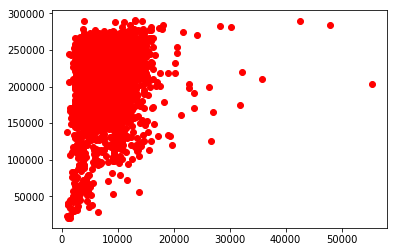

In [13]:
#Scatter of just quasars from the first dataset
plt.plot(qso[0]["distance"], qso[0]["velocity"], "ro")
plt.show()

In [14]:
#Slaughter some outliers
for i in range(len(galaxy)):
    galaxy[i] = galaxy[i][galaxy[i]["distance"]<10]


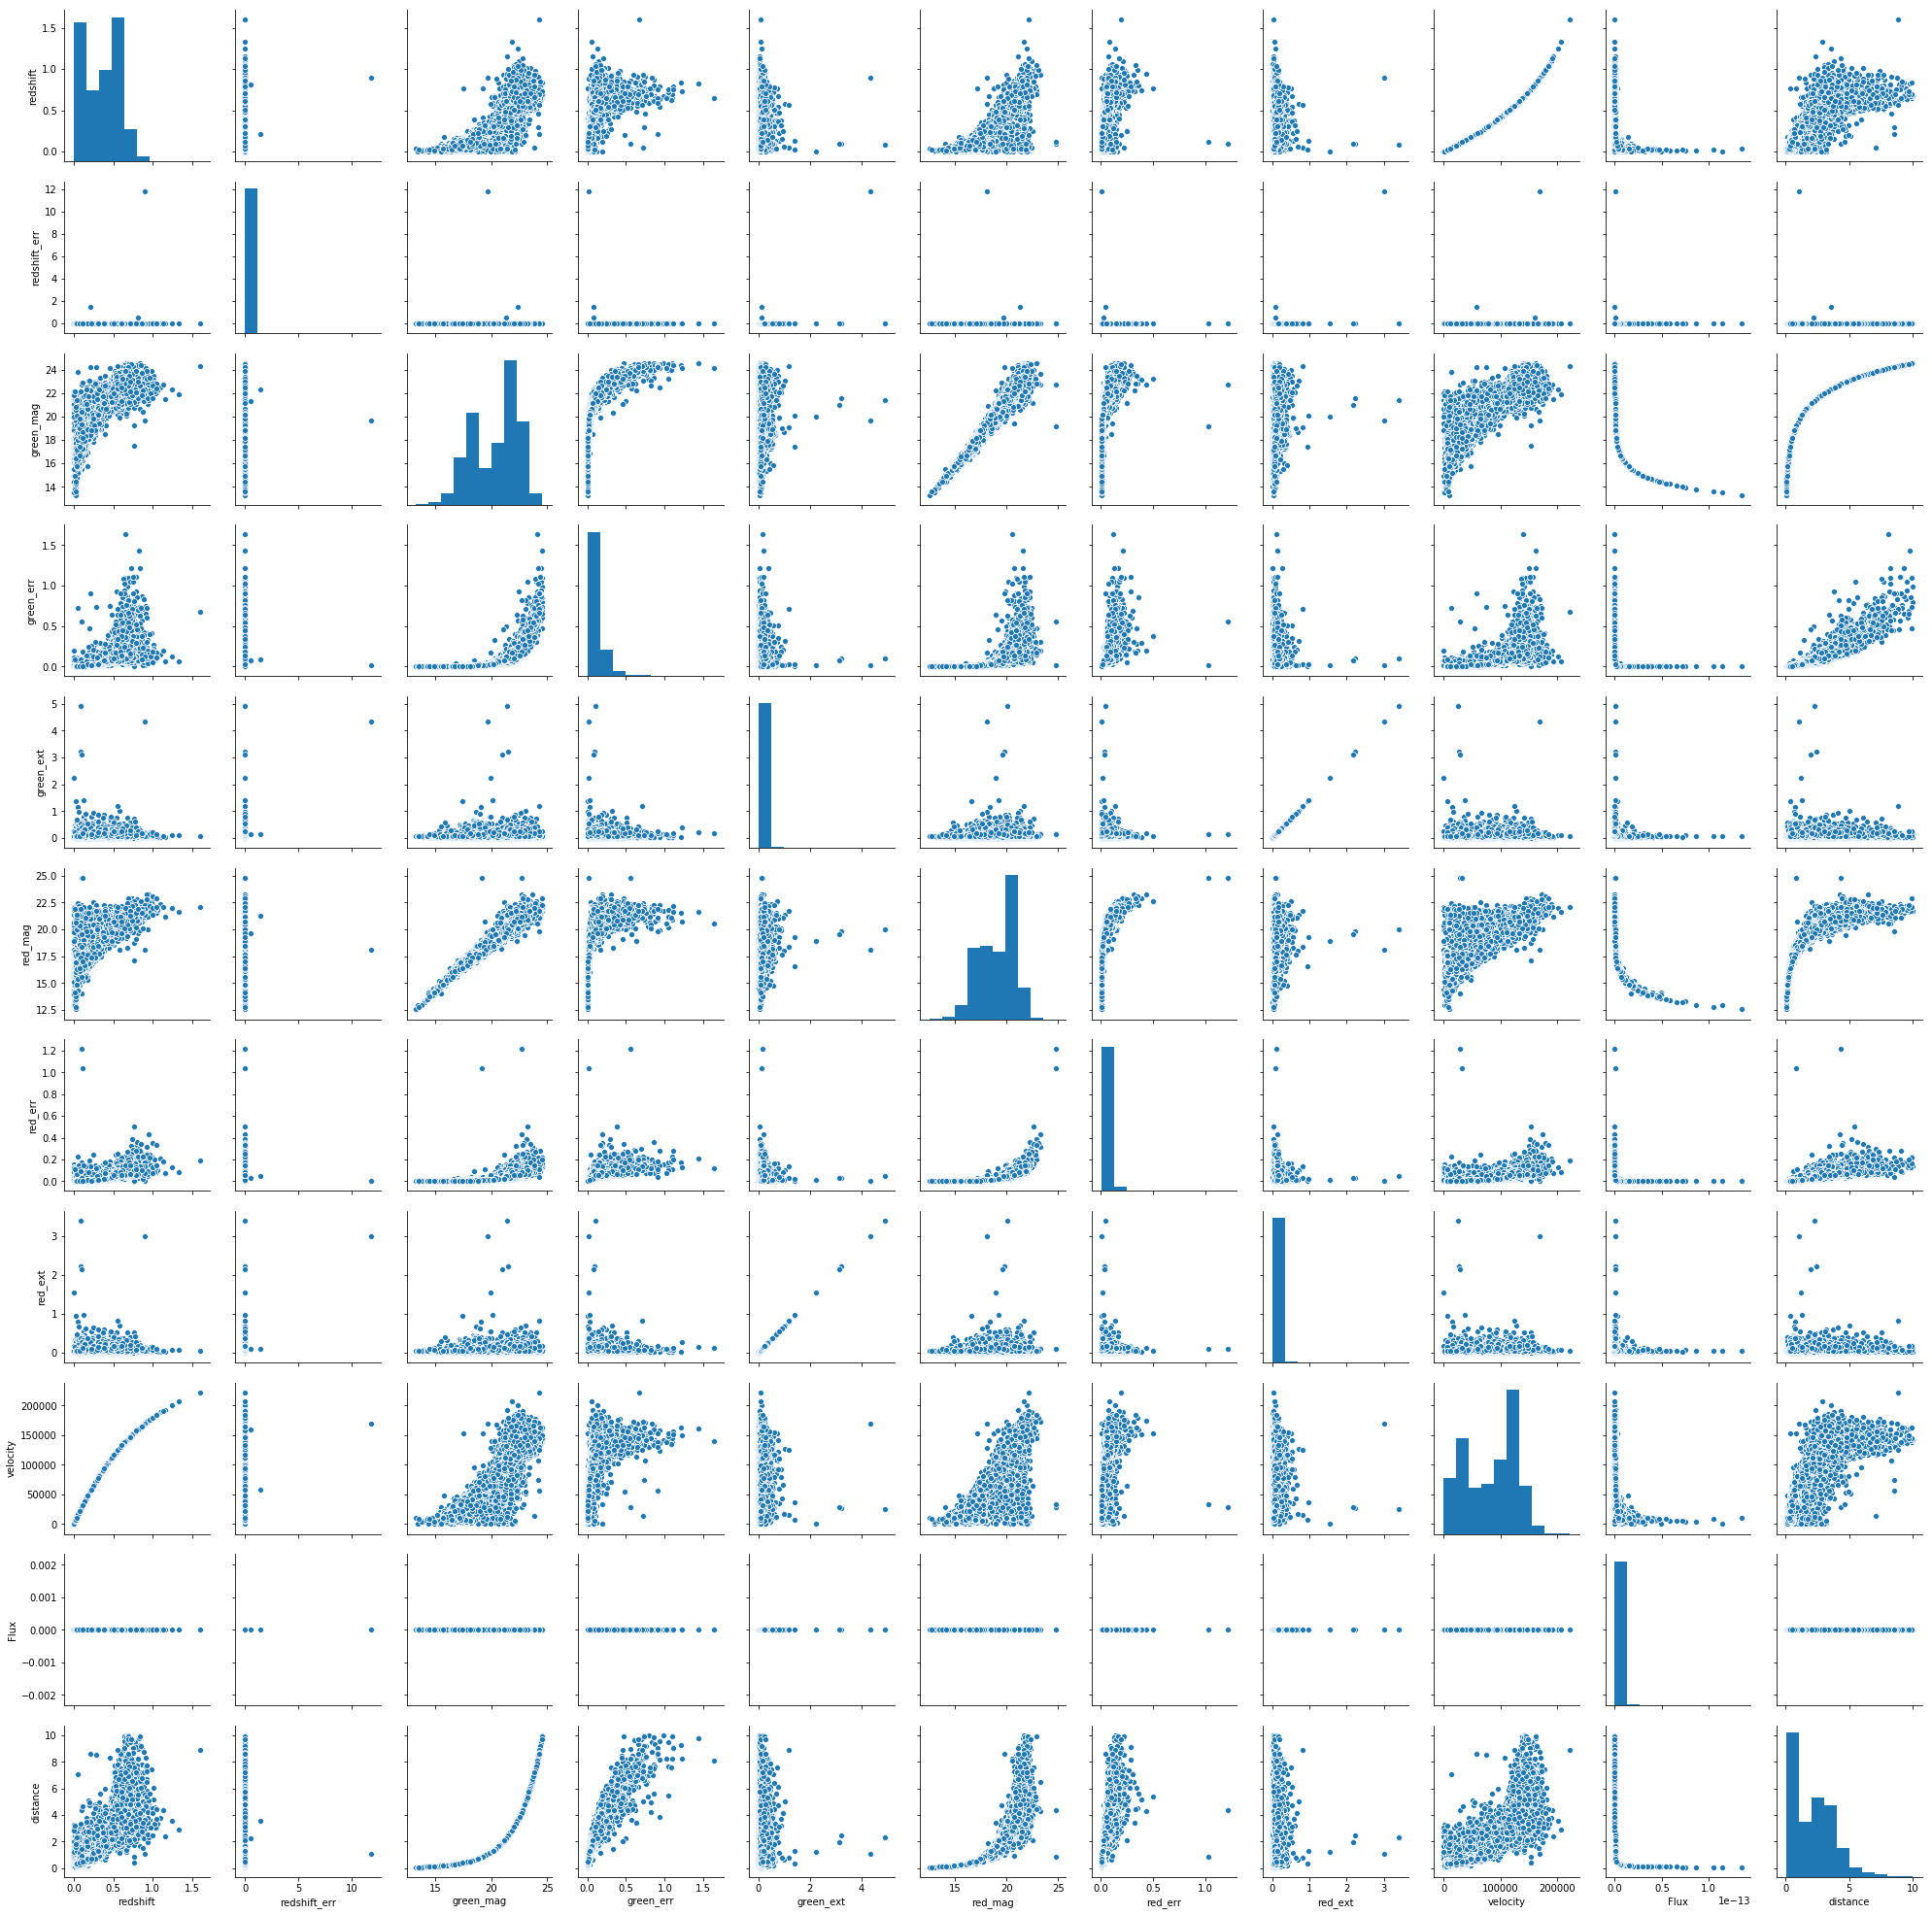

In [15]:
import seaborn as sns
sns.pairplot(galaxy[0])

In [16]:
model3 = sm.ols(formula = "galaxy[19]['velocity'] ~ galaxy[19]['distance']", data=galaxy[19]).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     galaxy[19]['velocity']   R-squared:                       0.710
Model:                                OLS   Adj. R-squared:                  0.710
Method:                     Least Squares   F-statistic:                 4.190e+04
Date:                    Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                            13:10:15   Log-Likelihood:            -1.9700e+05
No. Observations:                   17128   AIC:                         3.940e+05
Df Residuals:                       17126   BIC:                         3.940e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               3.465e+04    303.089    114.325      0.000    3.41e+04    3.52e+04
galaxy[19]['distance']  2.253e+04    110.089    204.695      0.000    2.23e+04    2.28e+04
==============================================================================
Omnibus:                     1502.474   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4779.163
Skew:                          -0.448   Prob(JB):                         0.00
Kurtosis:                       5.428   Cond. No.                         4.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
finaldata = []

for i in range(len(qso)):
    frames = [qso[i], galaxy[i]]
    whole_data = pd.concat(frames)
    finaldata.append(whole_data)

In [18]:
#Getting a flawed picture of the data just to see what we're dealing with. Nothing is weighted appropriately.

Galaxy_R_Squared = []
QSO_R_Squared = []
Total_R_Squared = []
i = 0
j = 0
k = 0
while (i < len(galaxy)):
    try:
        galaxy_outlierkiller = galaxy[i][galaxy[i]["distance"]<10]
        v = galaxy_outlierkiller['velocity']
        d = galaxy_outlierkiller['distance']
        data = galaxy_outlierkiller
        model4 = sm.ols(formula = "v ~ d", data=data).fit()
        Galaxy_R_Squared.append(model4.rsquared)
        i += 1
    except:
        break
    
while (j < len(qso)):
    try:
        v = qso[j]['velocity']
        d = qso[j]['distance']
        data = qso[j]
        model5 = sm.ols(formula = "v ~ d", data=data).fit()
        QSO_R_Squared.append(model5.rsquared)
        j += 1
    except:
        break
        
while (k < len(finaldata)):
    try:
        v = finaldata[k]['velocity']
        d = finaldata[k]['distance']
        data = finaldata[k]
        model5 = sm.ols(formula = "v ~ d", data=data).fit()
        Total_R_Squared.append(model5.rsquared)
        k += 1
    except:
        break
    
print("Galaxies: ",np.mean(Galaxy_R_Squared))
print(np.var(Galaxy_R_Squared))
print("Quasars: ",np.mean(QSO_R_Squared))
print(np.var(QSO_R_Squared))
print("Together: ",np.mean(Total_R_Squared))
print(np.var(Total_R_Squared))

Galaxies:  0.7106886471190607
3.29011090453224e-05
Quasars:  0.04130179123381078
9.400773403961374e-05
Together:  0.4638747045182316
0.00027035427354076604


In [19]:
#It seems like galaxies perform decently well, with an average R Squared value of .552 across all of the sets of data.
#Quasars seem horrible. Typical R Squared value of .087. Again, this is probably due to our luminosity assumptions.
#Let's see how the larger sets perform compared to the smaller ones.

Galaxy_R_Squared7k = []
QSO_R_Squared7k = []
Total_R_Squared7k = []
Galaxy_R_Squared14k = []
QSO_R_Squared14k = []
Total_R_Squared14k = []
Galaxy_R_Squared21k = []
QSO_R_Squared21k = []
Total_R_Squared21k = []
Galaxy_R_Squared28k = []
QSO_R_Squared28k = []
Total_R_Squared28k = []
i = 0
j = 0
k = 0

while (i < 5):
    galaxy_outlierkiller = galaxy[i][galaxy[i]["distance"]<12]
    v = galaxy_outlierkiller['velocity']
    d = galaxy_outlierkiller['distance']
    data= galaxy_outlierkiller
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Galaxy_R_Squared14k.append(model4.rsquared)
    i += 1
        
while ((i > 4) and (i < 10)):
    galaxy_outlierkiller = galaxy[i][galaxy[i]["distance"]<12]
    v = galaxy_outlierkiller['velocity']
    d = galaxy_outlierkiller['distance']
    data= galaxy_outlierkiller
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Galaxy_R_Squared21k.append(model4.rsquared)
    i += 1
        
while ((i > 9) and (i < 15)):
    galaxy_outlierkiller = galaxy[i][galaxy[i]["distance"]<12]
    v = galaxy_outlierkiller['velocity']
    d = galaxy_outlierkiller['distance']
    data= galaxy_outlierkiller
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Galaxy_R_Squared28k.append(model4.rsquared)
    i += 1

while ((i > 14) and (i < 20)):
    try:
        galaxy_outlierkiller = galaxy[i][galaxy[i]["distance"]<12]
        v = galaxy_outlierkiller['velocity']
        d = galaxy_outlierkiller['distance']
        data = galaxy_outlierkiller
        model4 = sm.ols(formula = "v ~ d", data=data).fit()
        Galaxy_R_Squared7k.append(model4.rsquared)
        i += 1
    except:
        break

In [20]:
#Quasars

while (j < 5):
    v = qso[j]['velocity']
    d = qso[j]['distance']
    data = qso[j]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    QSO_R_Squared14k.append(model4.rsquared)
    j += 1

while ((j > 4) and (j < 10)):
    v = qso[j]['velocity']
    d = qso[j]['distance']
    data = qso[j]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    QSO_R_Squared21k.append(model4.rsquared)
    j += 1

while ((j > 9) and (j < 15)):
    v = qso[j]['velocity']
    d = qso[j]['distance']
    data = qso[j]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    QSO_R_Squared28k.append(model4.rsquared)
    j += 1
        
while ((j > 14) and (j < 20)):
    v = qso[j]['velocity']
    d = qso[j]['distance']
    data = qso[j]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    QSO_R_Squared7k.append(model4.rsquared)
    j += 1

In [21]:
#Together

while (k < 5):
    v = finaldata[k]['velocity']
    d = finaldata[k]['distance']
    data = finaldata[k]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Total_R_Squared14k.append(model4.rsquared)
    k += 1

while ((k > 4) and (k < 10)):
    v = finaldata[k]['velocity']
    d = finaldata[k]['distance']
    data = finaldata[k]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Total_R_Squared21k.append(model4.rsquared)
    k += 1
  
while ((k > 9) and (k < 15)):
    v = finaldata[k]['velocity']
    d = finaldata[k]['distance']
    data = finaldata[k]
    model4 = sm.ols(formula = "v ~ d", data=data).fit()
    Total_R_Squared28k.append(model4.rsquared)
    k += 1
        
while ((k > 14) and (k < 20)):
    try:
        v = finaldata[k]['velocity']
        d = finaldata[k]['distance']
        data = finaldata[k]
        model4 = sm.ols(formula = "v ~ d", data=data).fit()
        Total_R_Squared7k.append(model4.rsquared)
        k += 1
    except:
        break

In [22]:
print("7k:")
print("Mean Total R Squared:",np.mean(Total_R_Squared7k))
print("Variance between Total R Squared values:",np.var(Total_R_Squared7k))
print("Mean Galaxy R Squared:",np.mean(Galaxy_R_Squared7k)) 
print("Variance between Galaxy R Squared values:",np.var(Galaxy_R_Squared7k))
print("Mean Quasar R Squared:",np.mean(QSO_R_Squared7k))
print("Variance between Quasar R Squared values:",np.var(QSO_R_Squared7k))
print("14k:")
print("Mean Total R Squared:",np.mean(Total_R_Squared14k))
print("Variance between Total R Squared values:",np.var(Total_R_Squared14k))
print("Mean Galaxy R Squared:",np.mean(Galaxy_R_Squared14k)) 
print("Variance between Galaxy R Squared values:",np.var(Galaxy_R_Squared14k))
print("Mean Quasar R Squared:",np.mean(QSO_R_Squared14k))
print("Variance between Quasar R Squared values:",np.var(QSO_R_Squared14k))
print("21k:")
print("Mean Total R Squared:",np.mean(Total_R_Squared21k))
print("Variance between Total R Squared values:",np.var(Total_R_Squared21k))
print("Mean Galaxy R Squared:",np.mean(Galaxy_R_Squared21k)) 
print("Variance between Galaxy R Squared values:",np.var(Galaxy_R_Squared21k))
print("Mean Quasar R Squared:",np.mean(QSO_R_Squared21k))
print("Variance between Quasar R Squared values:",np.var(QSO_R_Squared21k))
print("28k:")
print("Mean Total R Squared:",np.mean(Total_R_Squared28k))
print("Variance between Total R Squared values:",np.var(Total_R_Squared28k))
print("Mean Galaxy R Squared:",np.mean(Galaxy_R_Squared28k)) 
print("Variance between Galaxy R Squared values:",np.var(Galaxy_R_Squared28k))
print("Mean Quasar R Squared:",np.mean(QSO_R_Squared28k))
print("Variance between Quasar R Squared values:",np.var(QSO_R_Squared28k))

7k:
Mean Total R Squared: 0.46757406782695715
Variance between Total R Squared values: 0.00012349632597175164
Mean Galaxy R Squared: 0.7111704925850686
Variance between Galaxy R Squared values: 2.8811560780915735e-05
Mean Quasar R Squared: 0.04234065184071949
Variance between Quasar R Squared values: 3.566497949605566e-05
14k:
Mean Total R Squared: 0.46373757686592076
Variance between Total R Squared values: 0.00017454382606088507
Mean Galaxy R Squared: 0.7110154610966323
Variance between Galaxy R Squared values: 1.8358754912040177e-05
Mean Quasar R Squared: 0.037481012434276505
Variance between Quasar R Squared values: 8.433887726834478e-05
21k:
Mean Total R Squared: 0.4655070621855642
Variance between Total R Squared values: 0.0002062685566030641
Mean Galaxy R Squared: 0.7093295665081272
Variance between Galaxy R Squared values: 1.0059070829245365e-05
Mean Quasar R Squared: 0.040530711448268655
Variance between Quasar R Squared values: 0.00011136677962295103
28k:
Mean Total R Squared

In [23]:
H_o = []
weights = []
lengths = []
for i in range(len(galaxy)):
    current_frame = galaxy[i][galaxy[i]['distance']>0]
    model2 = sm.ols(formula="current_frame['velocity'] ~ np.log(current_frame['distance'])", data=current_frame).fit()
    H_o.append(model2.params[1])
    
for i in range(len(H_o)):
    weights.append(H_o[i]*len(galaxy[i]))
    lengths.append(len(galaxy[i]))

print("EXPERIMENTAL H_o:",sum(weights)/(1000*sum(lengths)))


    

EXPERIMENTAL H_o: 43.57285190516007


In [24]:
model6 = sm.ols("galaxy[32]['velocity'] ~ np.log(galaxy[32]['distance'])", data=galaxy[32]).fit()
model6.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     galaxy[32]['velocity']   R-squared:                       0.855
Model:                                OLS   Adj. R-squared:                  0.855
Method:                     Least Squares   F-statistic:                 3.429e+04
Date:                    Fri, 19 Apr 2019   Prob (F-statistic):               0.00
Time:                            13:10:17   Log-Likelihood:                -64948.
No. Observations:                    5818   AIC:                         1.299e+05
Df Residuals:                        5816   BIC:                         1.299e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                       6.575e+04    245.170    268.178      0.000    6.53e+04    6.62e+04
np.log(galaxy[32]['distance'])  4.402e+04    237.718    185.179      0.000    4.36e+04    4.45e+04
==============================================================================
Omnibus:                     1142.580   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9794.901
Skew:                          -0.695   Prob(JB):                         0.00
Kurtosis:                       9.203   Cond. No.                         1.55
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
finaldata2 = []

for i in range(len(qso)):
    frames = [qso[i], galaxy[i]]
    whole_data = pd.concat(frames)
    finaldata2.append(whole_data)

for i in range(len(finaldata2)):
    finaldata2[i].to_csv('no_outliers_%s.csv' %(1+i),index=False)